Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


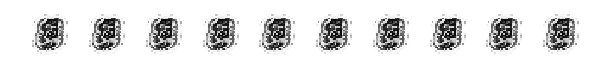

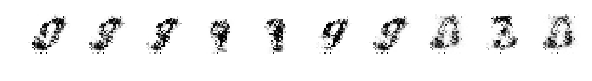

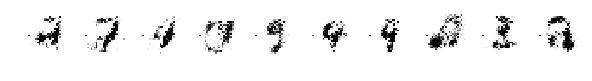

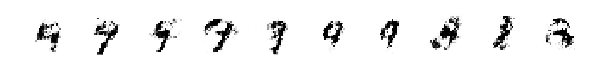

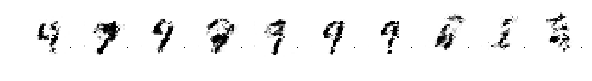

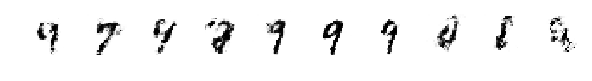

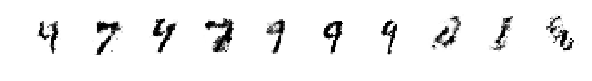

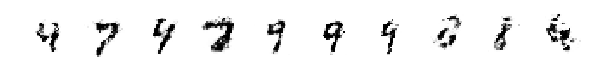

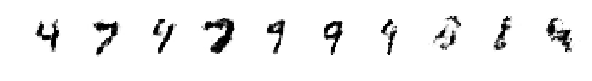

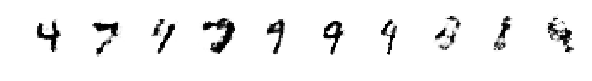

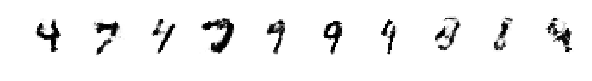

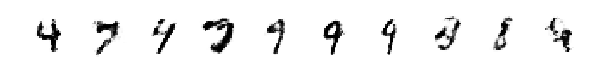

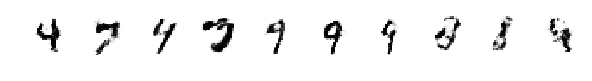

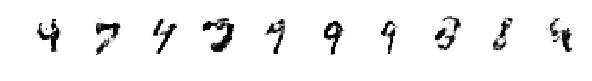

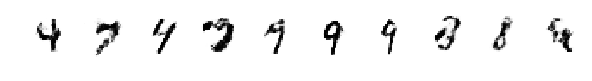

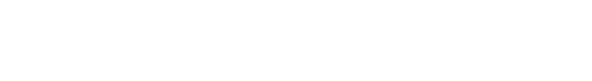

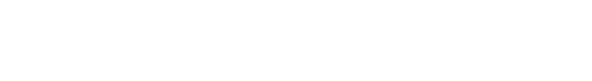

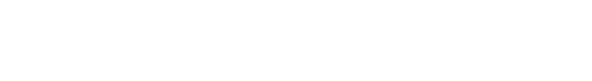

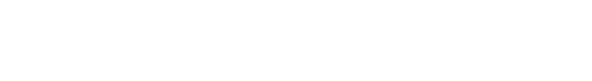

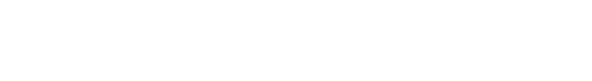

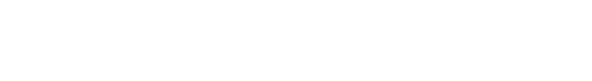

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
X = tf.placeholder(tf.float32, [None, 28 * 28]) 
Z = tf.placeholder(tf.float32, [None, 128])

G_W1 = tf.Variable(tf.random_normal([128, 256], stddev=0.01))
G_W2 = tf.Variable(tf.random_normal([256, 28 * 28], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([256]))
G_b2 = tf.Variable(tf.zeros([28 * 28]))

def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)
    return output

D_W1 = tf.Variable(tf.random_normal([28 * 28, 256], stddev=0.01))
D_W2 = tf.Variable(tf.random_normal([256, 1], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([256]))
D_b2 = tf.Variable(tf.zeros([1]))

def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)
    return output

G = generator(Z)
loss_D = -tf.reduce_mean(tf.log(discriminator(X)) + tf.log(1 - discriminator(G)))
loss_G = -tf.reduce_mean(tf.log(discriminator(G)))
train_D = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(loss_D, var_list=[D_W1, D_b1, D_W2, D_b2])
train_G = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(loss_G, var_list=[G_W1, G_b1, G_W2, G_b2])

sess = tf.Session()
sess.run(tf.global_variables_initializer())

noise_test = np.random.normal(size=(10, 128))
for epoch in range(200):
    for i in range(int(mnist.train.num_examples / 100)):
      batch_xs, _ = mnist.train.next_batch(100)
      noise = np.random.normal(size=(100, 128))

      sess.run(train_D, feed_dict={X: batch_xs, Z: noise})
      sess.run(train_G, feed_dict={Z: noise})

    if epoch == 0 or (epoch + 1) % 10 == 0: 
      samples = sess.run(G, feed_dict={Z: noise_test})

      fig, ax = plt.subplots(1, 10, figsize=(10, 1))
      for i in range(10):
        ax[i].set_axis_off()
        ax[i].imshow(np.reshape(samples[i], (28, 28)))